# Smoking is bad

In [57]:
# TODO: install all the necessary packages
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import probit
from pathlib import Path




In [58]:
# TODO: load the data using the pathlib library to create the path to your data

path = Path('data/smoking_data.csv')
smoke_df = pd.read_csv(path)
print(smoke_df)


      Unnamed: 0 outcome smoker  age  gender   salary
0              0   Alive    Yes   23  female   7286.0
1              1   Alive    Yes   18    male      NaN
2              2    Dead    Yes   71    male      NaN
3              3   Alive     No   67    male      NaN
4              4   Alive     No   64  female  20123.0
...          ...     ...    ...  ...     ...      ...
1309        1309   Alive    Yes   35  female      NaN
1310        1310   Alive     No   33  female      NaN
1311        1311   Alive    Yes   21    male      NaN
1312        1312   Alive     No   46  female      NaN
1313        1313   Alive    Yes   41  female   9433.0

[1314 rows x 6 columns]


In [59]:
# TODO: what are the dimensions of the data frame?
smoke_df.shape

(1314, 6)

In [60]:
# TODO: use .describe() on your data frame: what do you notice about the string columns?
smoke_df.describe()

"""
The string columns dissapear as they are not numeric.
"""

'\nThe string columns dissapear as they are not numeric.\n'

In [61]:
# TODO: do not forget to check the null values

# 1. See how many nulls
print(smoke_df.isnull().sum())

# 2. See percentage
print(smoke_df.isnull().sum() / len(smoke_df) * 100)

# 3. Check patterns
print(smoke_df[smoke_df['salary'].isnull()]['smoker'].value_counts())

Unnamed: 0      0
outcome         0
smoker          0
age             0
gender          0
salary        700
dtype: int64
Unnamed: 0     0.000000
outcome        0.000000
smoker         0.000000
age            0.000000
gender         0.000000
salary        53.272451
dtype: float64
smoker
No     397
Yes    303
Name: count, dtype: int64


In [62]:
# TODO: prepare your data frame so that you can work with

smoke_df['smokes'] = (smoke_df['smoker'] == 'Yes').astype(int)
smoke_df['alive'] = (smoke_df['outcome'] == 'Alive').astype(int)
smoke_df['female'] = (smoke_df['gender'] == 'female').astype(int)


smoke_df.head()

,Unnamed: 0,outcome,smoker,age,gender,salary,smokes,alive,female
0,0,Alive,Yes,23,female,7286.0,1,1,1
1,1,Alive,Yes,18,male,NaN,1,1,0
2,2,Dead,Yes,71,male,NaN,1,0,0
3,3,Alive,No,67,male,NaN,0,1,0
4,4,Alive,No,64,female,20123.0,0,1,1


## Smoking analysis
Let's first check what your cousin did.

In [63]:
# TODO: Reimplement the small code snippet described in the problem set instructions.

smoke_df.groupby(["smokes"]).agg(prob_alive = ("alive", np.mean))

/var/folders/h6/7yp_ymqd6mq5hrczq9ztfc580000gn/T/ipykernel_35199/3093529135.py:3: FutureWarning: The provided callable <function mean at 0x10611ade0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  smoke_df.groupby(["smokes"]).agg(prob_alive = ("alive", np.mean))


,prob_alive
smokes,
0,0.685792
1,0.761168


You should get the same results.

# Is smoking really good?
Now it is up to you to run the analysis further and check what could be underlying your cousings results.

In [64]:
# Select only numeric columns
numeric_smoke_df = smoke_df.select_dtypes(include=['number'])
print(numeric_smoke_df)

      Unnamed: 0  age   salary  smokes  alive  female
0              0   23   7286.0       1      1       1
1              1   18      NaN       1      1       0
2              2   71      NaN       1      0       0
3              3   67      NaN       0      1       0
4              4   64  20123.0       0      1       1
...          ...  ...      ...     ...    ...     ...
1309        1309   35      NaN       1      1       1
1310        1310   33      NaN       0      1       1
1311        1311   21      NaN       1      1       0
1312        1312   46      NaN       0      1       1
1313        1313   41   9433.0       1      1       1

[1314 rows x 6 columns]


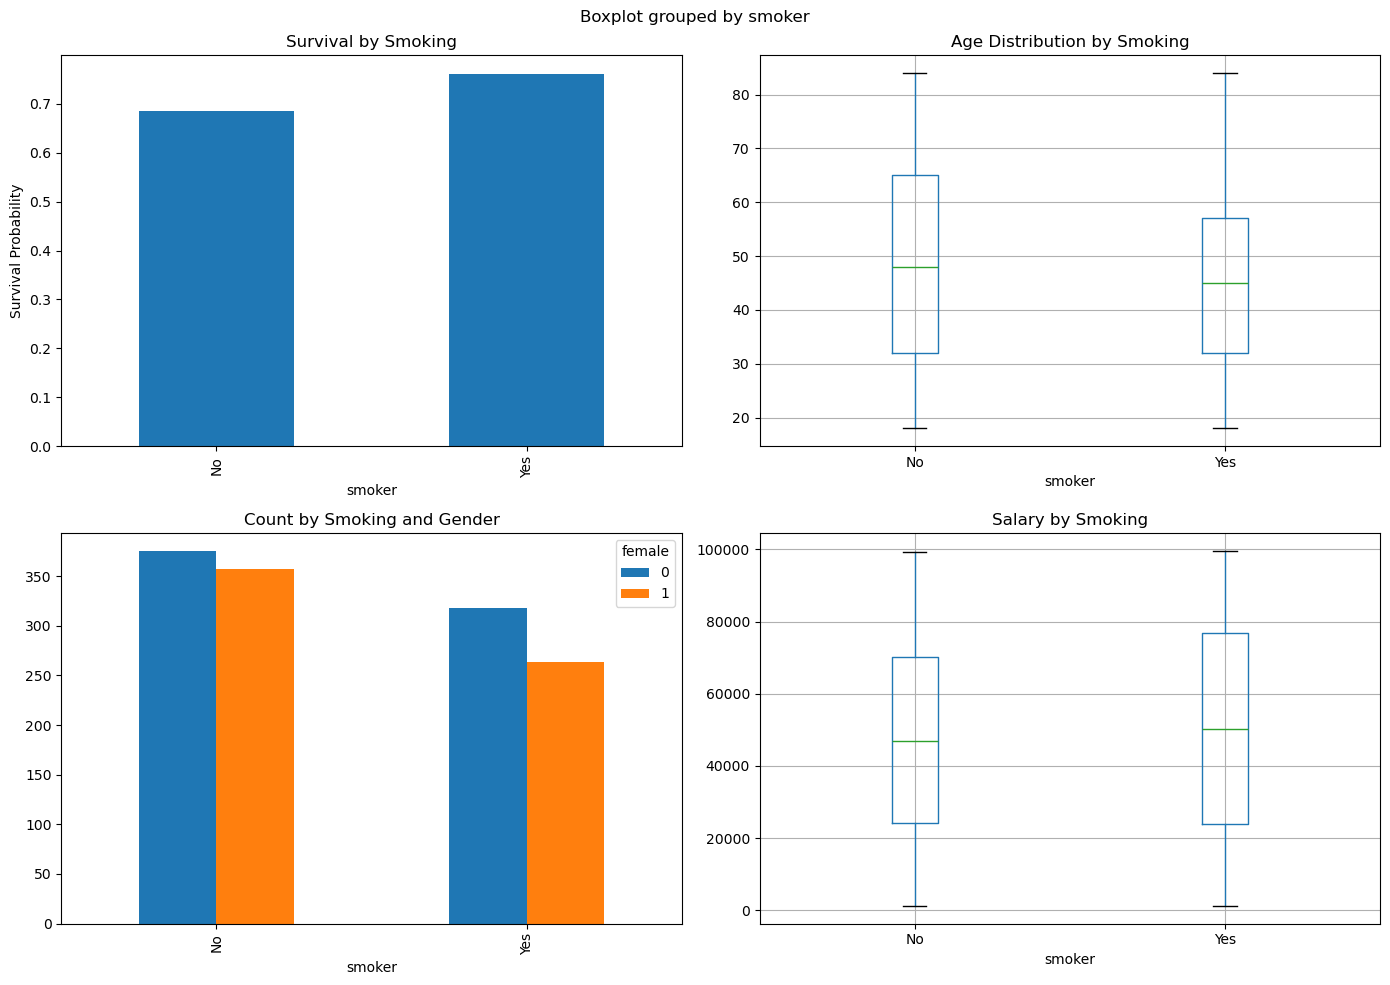

In [65]:
#Firstly trying to explain whether you're dead or alive.

import seaborn as sns

# Create subplots for each variable
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Survival by smoker
smoke_df.groupby('smoker')['alive'].mean().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Survival by Smoking')
axes[0,0].set_ylabel('Survival Probability')

# Age distribution
smoke_df.boxplot(column='age', by='smoker', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Smoking')

# Gender distribution
smoke_df.groupby(['smoker', 'female'])['alive'].count().unstack().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Count by Smoking and Gender')

# Salary by smoking
smoke_df.boxplot(column='salary', by='smoker', ax=axes[1,1])
axes[1,1].set_title('Salary by Smoking')

plt.tight_layout()
plt.show()



In [66]:
#Estimating probit of being alive just using smoking
model = probit('alive ~ smokes', data=numeric_smoke_df.dropna())
results = model.fit()
print(results.summary())


Optimization terminated successfully.
         Current function value: 0.587200
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                  alive   No. Observations:                  614
Model:                         Probit   Df Residuals:                      612
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 Nov 2025   Pseudo R-squ.:                0.007324
Time:                        16:32:17   Log-Likelihood:                -360.54
converged:                       True   LL-Null:                       -363.20
Covariance Type:            nonrobust   LLR p-value:                   0.02108
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4777      0.071      6.692      0.000       0.338       0.618
smokes         0.2513      0.

In [67]:
# Estimate probit model
model = probit('alive ~ smokes + age + female + salary', 
               data=numeric_smoke_df.dropna())
results = model.fit()

# Print results
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.368356
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                  alive   No. Observations:                  614
Model:                         Probit   Df Residuals:                      609
Method:                           MLE   Df Model:                            4
Date:                Wed, 05 Nov 2025   Pseudo R-squ.:                  0.3773
Time:                        16:32:18   Log-Likelihood:                -226.17
converged:                       True   LL-Null:                       -363.20
Covariance Type:            nonrobust   LLR p-value:                 4.251e-58
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0584      0.347     11.703      0.000       3.379       4.738
smokes        -0.1188      0.

Using just smoking as an explanatory variable for probability of being alive explains very little variation (Pseudo R^2 = 1%)

Adding factors such as ages and being a female we are able to explain a lot more variation (37%) and the impact of smoking makes it 10% less likely that you are Alive. It may be that smoking was correlated with other factors.

In [70]:
print(numeric_smoke_df.corr())

            Unnamed: 0       age    salary    smokes     alive    female
Unnamed: 0    1.000000 -0.004252  0.037349 -0.045678  0.023887 -0.039136
age          -0.004252  1.000000 -0.031890 -0.114519 -0.627749 -0.026889
salary        0.037349 -0.031890  1.000000  0.035535  0.011596  0.065957
smokes       -0.045678 -0.114519  0.035535  1.000000  0.083315 -0.033925
alive         0.023887 -0.627749  0.011596  0.083315  1.000000  0.065772
female       -0.039136 -0.026889  0.065957 -0.033925  0.065772  1.000000
